In [1]:
# Importing relevant libraries
import pandas as pd
import seaborn as sns
from pathlib import Path

# sklearn for machine learning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

# xgboost for gradient boosting classifier
from xgboost.sklearn import XGBClassifier

In [2]:
import sqlite3

# SQL-based Data Retrieval

conn = sqlite3.connect(':memory:')  # In-memory database
data = pd.read_csv('Resources/heart_failure_clinical_records_dataset.csv')
data.to_sql('heart_failure', conn, index=False, if_exists='replace')
query = "SELECT * FROM heart_failure"
df = pd.read_sql(query, conn)


In [5]:
df.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [6]:
# Separating features "X" from target variable "y"
y = df ['DEATH_EVENT'] # target/dependent variables
X = df.drop(columns='DEATH_EVENT') # features/independent variables

In [7]:
# Separating data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# Scaling Dataset

# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Instantiate Gradient Boosting Classifier 
gbr = GradientBoostingClassifier(
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1, 
                                random_state = 42,
                                max_features = 12)

In [13]:
# Fit the model on the training data
gbr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test_scaled)

# Generate classification report
report = classification_report(y_test, y_pred)


In [15]:
# Generating a classification report for the model

target_labels = ["Not Deceased","Deceased"]
print(classification_report(y_test, y_pred, target_names=target_labels))
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

Not Deceased       0.90      0.96      0.93        55
    Deceased       0.88      0.70      0.78        20

    accuracy                           0.89        75
   macro avg       0.89      0.83      0.85        75
weighted avg       0.89      0.89      0.89        75



# Using the XGBOOST library to train another gradient boosting model

In [16]:
# Using XGBoot as the gradient boosting classifier model

#training the model

clf = XGBClassifier(max_depth=5)
clf.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
# Predict on the test set
y_pred_xgboost = clf.predict(X_test_scaled)

In [18]:
target_labels = ["Not Deceased","Deceased"]
print(classification_report(y_test, y_pred_xgboost, target_names=target_labels))

              precision    recall  f1-score   support

Not Deceased       0.94      0.93      0.94        55
    Deceased       0.81      0.85      0.83        20

    accuracy                           0.91        75
   macro avg       0.88      0.89      0.88        75
weighted avg       0.91      0.91      0.91        75



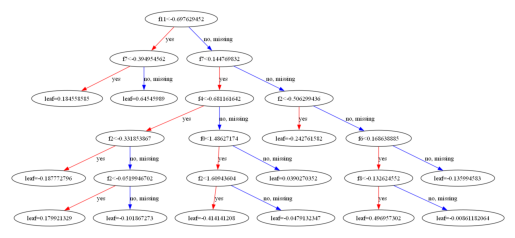

In [19]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
plot_tree(clf)

# Visualizing a single decision tree (the first)
plt.show()